<a href="https://colab.research.google.com/github/iqbalhanif/NN-with-Keras/blob/master/spam_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import important packages
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
#get data
!wget https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv

--2020-09-09 04:20:31--  https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.04s   

2020-09-09 04:20:31 (12.2 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
#convert data to pandas dataframe
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df = df.iloc[:,0:2]
df['v1'] = df['v1'].astype('category')
df['v3'] = df['v1'].cat.codes
df.head(5)

,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df.shape

(5572, 3)

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
kalimat = df['v2'].values
y = df['v3'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [ ]:
#tokenisasi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [ ]:
#arsitektur NN
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
#running model
num_epochs = 30
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
140/140 - 14s - loss: 0.2246 - accuracy: 0.9255 - val_loss: 0.0427 - val_accuracy: 0.9874
Epoch 2/30
140/140 - 15s - loss: 0.0349 - accuracy: 0.9904 - val_loss: 0.0511 - val_accuracy: 0.9830
Epoch 3/30
140/140 - 15s - loss: 0.0156 - accuracy: 0.9957 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 4/30
140/140 - 15s - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0272 - val_accuracy: 0.9910
Epoch 5/30
140/140 - 15s - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0321 - val_accuracy: 0.9910
Epoch 6/30
140/140 - 15s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0308 - val_accuracy: 0.9910
Epoch 7/30
140/140 - 15s - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 8/30
140/140 - 15s - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0567 - val_accuracy: 0.9821
Epoch 9/30
140/140 - 15s - loss: 9.3416e-04 - accuracy: 0.9998 - val_loss: 0.0512 - val_accuracy: 0.9892
Epoch 10/30
140/140 - 15s - loss: 4.6369e-04 - accuracy: 0.9998 - val_loss: 0.0773 - va

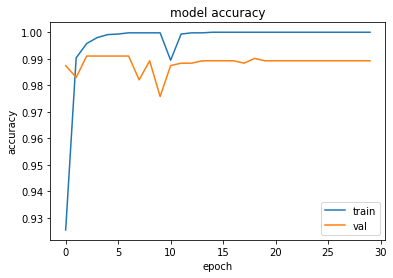

In [ ]:
#plot akurasi
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

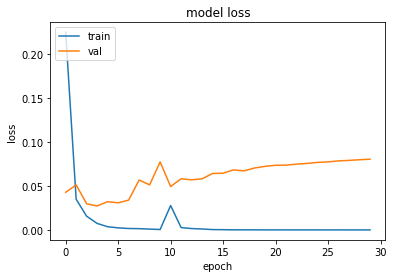

In [ ]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()